## Linear Regression

### Pure Python Code

In [1]:
import pandas as pd
df = pd.read_csv("california_housing.csv")
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
import statsmodels.api as sm

df = df.dropna()
X = sm.add_constant(df["median_income"])
y = df["median_house_value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 1.840e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:56:34   Log-Likelihood:            -2.6061e+05
No. Observations:               20433   AIC:                         5.212e+05
Df Residuals:                   20431   BIC:                         5.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.491e+04   1329.965     33.765

In [11]:
df["avg_rooms"] = df["total_rooms"]/df["population"]
df["avg_bedrooms"] = df["total_bedrooms"]/df["population"]
df["avg_household_size"] = df["population"]/df["households"]

X = sm.add_constant(df[["median_income","avg_rooms",\
                        "avg_bedrooms","avg_household_size"]])
y = df["median_house_value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5391.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:02:03   Log-Likelihood:            -2.5981e+05
No. Observations:               20433   AIC:                         5.196e+05
Df Residuals:                   20428   BIC:                         5.197e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1320.6490   1769

In [13]:
import statsmodels.api as sm

X = sm.add_constant(df[["median_income","avg_bedrooms","avg_household_size"]])
y = df["median_house_value"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     6443.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:10:05   Log-Likelihood:            -2.6037e+05
No. Observations:               20433   AIC:                         5.207e+05
Df Residuals:                   20429   BIC:                         5.208e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.438e+04   1678

### GuidedStats

In [2]:
from guidedstats import GuidedStats
import pandas as pd

df = pd.read_csv("california_housing.csv")
gs = GuidedStats(df)
gs

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [3]:
dataset = gs.export("dataset")
dataset = dataset[dataset["median_house_value"] != 500001]
gs._import("dataset",dataset)

In [3]:
dataset = gs.export("dataset")
dataset = dataset.dropna()
gs._import("dataset",dataset)

In [4]:
dataset = gs.export("dataset")
dataset["avg_rooms"] = dataset["total_rooms"]/dataset["population"]
dataset["avg_bedrooms"] = dataset["total_bedrooms"]/dataset["population"]
gs._import("dataset",dataset)

/var/folders/fx/94vx28g17c9172vwjsxbmsk80000gn/T/ipykernel_49849/1570035262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["avg_rooms"] = dataset["total_rooms"]/dataset["population"]
/var/folders/fx/94vx28g17c9172vwjsxbmsk80000gn/T/ipykernel_49849/1570035262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["avg_bedrooms"] = dataset["total_bedrooms"]/dataset["population"]


In [14]:
model1 = b.export("model")

In [15]:
model2 = b.export("model")

In [16]:
model1.compare(model2)

Metric,Model 1,Model 2
R-squared,0.4738,0.4153
Adjusted R-squared,0.4738,0.4152
F-statistic,18398.8964,13753.9141
Prob (F-statistic),0.0000,0.0000
Log-Likelihood,-260608.9012,-244369.0102
AIC,521221.8025,488742.0205
BIC,521237.6523,488757.7633
Coefficient (median_income),41837.0661***,39491.7767***
Coefficient (const),44906.3695***,46045.9409***


In [17]:
df_no_outliers = b.export("dataset")

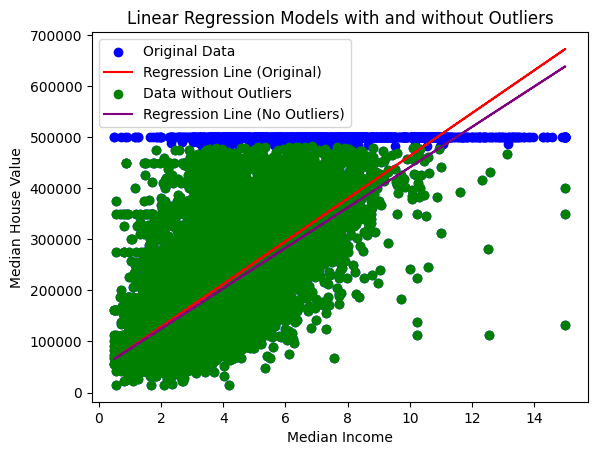

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

X = df[["median_income"]]
y = df["median_house_value"]

X_no_outliers = df_no_outliers[["median_income"]]
y_no_outliers = df_no_outliers["median_house_value"]

plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, model1.predict(X), color='red', \
         label='Regression Line (Original)')
plt.scatter(X_no_outliers, y_no_outliers,\
        color='green', label='Data without Outliers')
plt.plot(X_no_outliers, model2.predict(X_no_outliers),\
         color='purple', label='Regression Line (No Outliers)')
plt.title("Linear Regression Models with and without Outliers")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

## Two Sample T-test

In [1]:
import pandas as pd
df = pd.read_csv("TeachingRatings.csv")
df.head(5)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


In [2]:
from guidedstats import GuidedStats

gs = GuidedStats(df)
gs

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [30]:
df["credits"].unique()

array(['more', 'single'], dtype=object)

In [31]:
from statsmodels.stats.weightstats import ttest_ind
more = df[df["credits"] == "more"]["eval"]
single = df[df["credits"] == "single"]["eval"]
tstat,pvalue,degree_freedom = ttest_ind(more,single)
print("T Statistic:",tstat)
print("P-value:",pvalue)
print("Degree of Freedom:",degree_freedom)

T Statistic: -5.196637715207988
P-value: 3.0538453630463973e-07
Degree of Freedom: 461.0


In [9]:
import pandas as pd
df = pd.read_csv("TeachingRatings.csv")
df.head(5)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


In [3]:
from guidedstats import GuidedStats
import pandas as pd

df = pd.read_csv("auto-mpg.csv")
gs = GuidedStats(df)
gs

GuidedStats(builtinAssumptions=['Outliers Checking', 'Levene Test', 'Normality Test', 'Multicollinearity Test'…

In [4]:
dataset = gs.export("dataset")
dataset['origin'] = dataset.origin.astype('category')
gs._import("dataset",dataset)